In [68]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words=10000)

Например, для классификации в две категории можно использовать функцию бинарной перекрестной энтропии, для классификации в не- сколько категорий — многозначной перекрестной энтропии, для задач регрессии — среднеквадратичной ошибки, для обучения на последовательностях — ассоциативной временной классификации (Connectionist Temporal Classification, CTC) и т. д.

## 3 .4 . Классификация отзывов к фильмам: пример бинарной классификации

In [2]:
import keras
keras.__version__

'2.3.1'

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
max([max(sequence) for sequence in train_data])
#Поскольку мы ограничили себя 10 000 наиболее употребительных слов, в наборе отсутствуют индексы больше 10 000

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) 
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Кодирование последовательностей целых чисел в бинарную матрицу

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension)) #Создание матрицы с фор- мой (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. #Запись единицы в элемент с данным индексом
    return results

In [8]:
x_train = vectorize_sequences(train_data) #Векторизованные обучающие данные
x_test = vectorize_sequences(test_data) #Векторизованные контрольные данные

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

Нам также нужно векторизовать метки, что делается очень просто:

In [11]:
y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32')

In [12]:
print(type(train_labels[0]))
print(type(y_train[0]))

<class 'numpy.int64'>
<class 'numpy.float32'>


In [13]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [14]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

### Конструирование сети

In [15]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

In [17]:
# #Настройка оптимизатора
# from keras import optimizers

# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

In [18]:
# #Использование нестандартных функций потерь и метрик
# from keras import losses
# from keras import metrics

# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss=losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy])

In [19]:
#Создание проверочного набора 
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000] 
partial_y_train = y_train[10000:]

In [20]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 287us/step - loss: 0.5182 - acc: 0.7865 - val_loss: 0.3944 - val_acc: 0.8662
Epoch 2/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.3149 - acc: 0.9015 - val_loss: 0.3119 - val_acc: 0.8839
Epoch 3/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.2279 - acc: 0.9292 - val_loss: 0.2792 - val_acc: 0.8912
Epoch 4/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1818 - acc: 0.9425 - val_loss: 0.2805 - val_acc: 0.8864
Epoch 5/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.1487 - acc: 0.9532 - val_loss: 0.2799 - val_acc: 0.8879
Epoch 6/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1251 - acc: 0.9601 - val_loss: 0.2870 - val_acc: 0.8874
Epoch 7/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.1023 - acc: 0.9692 - val_loss: 0.3057 - va

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [26]:
import matplotlib.pyplot as plt

# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history_dict['loss'] 
# val_loss = history_dict['val_loss']

# epochs = range(1, len(acc) + 1)

# #«bo» - «синяя точка»
# plt.plot(epochs, loss_values, 'bo', label='Training loss') 
# plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss') 
# plt.legend()
# plt.show()


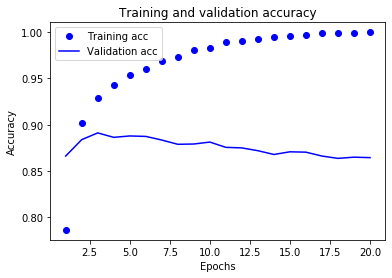

In [27]:
plt.clf() #Очистить рисунок
acc = history_dict['acc']
val_acc= history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

## А теперь обучим новую сеть с нуля в течение четырех эпох и затем оценим получившийся результат на контрольных данных.


In [28]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs=4,
          batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.4757 - accuracy: 0.8187
Epoch 2/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.2735 - accuracy: 0.9073
Epoch 3/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2051 - accuracy: 0.9278
Epoch 4/4
25000/25000 [==============================] - 5s 184us/step


In [29]:
#Это простейшее решение позволило достичь точности 88 %.
results

[0.2911772852802277, 0.8841999769210815]

In [30]:
model.predict(x_test)

array([[0.19202387],
       [0.9986292 ],
       [0.8771146 ],
       ...,
       [0.10484046],
       [0.06336246],
       [0.63275194]], dtype=float32)

______

# 3 .5 . Классификация новостных лент: пример классификации в несколько классов


In [31]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

In [32]:
len(train_data)

8982

In [33]:
len(test_data)

2246

In [34]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [35]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index. items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])

In [36]:
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [37]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [38]:
#Метка, определяющая класс примера, — это целое число между 0 и 45 — индекс темы:
train_labels[10]

3

In [39]:
import numpy as np

In [40]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results

In [41]:
x_train = vectorize_sequences(train_data) # Векторизованные обучающие данные
x_test = vectorize_sequences(test_data) # Векторизованные контрольные данные

In [42]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [43]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [44]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1. 
    return results

In [45]:
one_hot_train_labels = to_one_hot(train_labels) 
one_hot_test_labels = to_one_hot(test_labels)

In [46]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Следует отметить, что этот способ уже реализован в Keras, как мы видели в примере MNIST:

In [48]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels) #Векторизованные обучающие данные
one_hot_test_labels = to_categorical(test_labels) #Векторизованные контрольные данные

In [49]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [50]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [52]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [54]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 222us/step - loss: 2.5137 - accuracy: 0.5423 - val_loss: 1.6678 - val_accuracy: 0.6620
Epoch 2/20
7982/7982 [==============================] - 1s 142us/step - loss: 1.3937 - accuracy: 0.7102 - val_loss: 1.2853 - val_accuracy: 0.7120
Epoch 3/20
7982/7982 [==============================] - 1s 118us/step - loss: 1.0360 - accuracy: 0.7766 - val_loss: 1.1127 - val_accuracy: 0.7620
Epoch 4/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.8135 - accuracy: 0.8252 - val_loss: 1.0130 - val_accuracy: 0.7770
Epoch 5/20
7982/7982 [==============================] - 1s 171us/step - loss: 0.6486 - accuracy: 0.8614 - val_loss: 0.9617 - val_accuracy: 0.7900
Epoch 6/20
7982/7982 [==============================] - 1s 155us/step - loss: 0.5171 - accuracy: 0.8930 - val_loss: 0.9164 - val_accuracy: 0.7990
Epoch 7/20
7982/7982 [==============================] - 1s 152us/step - loss

In [55]:
import matplotlib.pyplot as plt

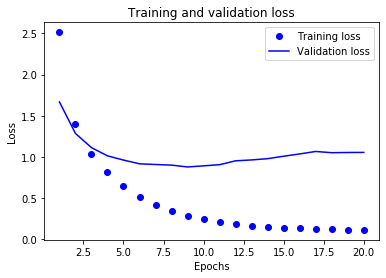

In [56]:
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()

plt.show()

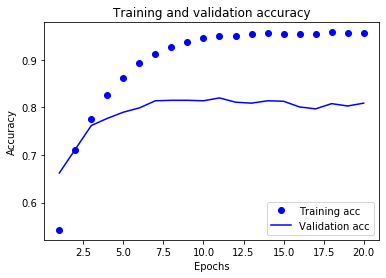

In [57]:
plt.clf() 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [58]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 139us/step - loss: 2.6166 - accuracy: 0.5345 - val_loss: 1.7332 - val_accuracy: 0.6340
Epoch 2/9
7982/7982 [==============================] - 1s 118us/step - loss: 1.4062 - accuracy: 0.7090 - val_loss: 1.2843 - val_accuracy: 0.7160
Epoch 3/9
7982/7982 [==============================] - 1s 105us/step - loss: 1.0379 - accuracy: 0.7772 - val_loss: 1.1359 - val_accuracy: 0.7470
Epoch 4/9
7982/7982 [==============================] - 1s 113us/step - loss: 0.8137 - accuracy: 0.8270 - val_loss: 1.0139 - val_accuracy: 0.7680
Epoch 5/9
7982/7982 [==============================] - 1s 141us/step - loss: 0.6500 - accuracy: 0.8604 - val_loss: 0.9438 - val_accuracy: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 106us/step - loss: 0.5136 - accuracy: 0.8903 - val_loss: 0.9219 - val_accuracy: 0.8000
Epoch 7/9
7982/7982 [==============================] - 1s 145us/step - loss: 0.415

In [59]:
results

[0.980120306448117, 0.7849510312080383]

In [60]:
predictions = model.predict(x_test)

In [61]:
predictions[1].shape

(46,)

In [62]:
#Сумма коэффициентов этого вектора равна 1:
np.sum(predictions[1])

0.99999994

In [63]:
#Наибольший элемент, элемент с наибольшей вероятностью, — это предсказанный класс:
np.argmax(predictions[4])

13

In [64]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=256,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 128us/step - loss: 3.5139 - accuracy: 0.1156 - val_loss: 3.1754 - val_accuracy: 0.3550
Epoch 2/20
7982/7982 [==============================] - 1s 112us/step - loss: 2.8654 - accuracy: 0.3701 - val_loss: 2.6218 - val_accuracy: 0.3840
Epoch 3/20
7982/7982 [==============================] - 1s 112us/step - loss: 2.3772 - accuracy: 0.4168 - val_loss: 2.2926 - val_accuracy: 0.4220
Epoch 4/20
7982/7982 [==============================] - 1s 112us/step - loss: 2.0509 - accuracy: 0.4483 - val_loss: 2.0405 - val_accuracy: 0.4460
Epoch 5/20
7982/7982 [==============================] - 1s 112us/step - loss: 1.7366 - accuracy: 0.4980 - val_loss: 1.7409 - val_accuracy: 0.5850
Epoch 6/20
7982/7982 [==============================] - 1s 112us/step - loss: 1.4034 - accuracy: 0.6611 - val_loss: 1.5031 - val_accuracy: 0.6530
Epoch 7/20
7982/7982 [==============================] - 1s 111us/step - loss

In [65]:
results

[1.6121739126801597, 0.6914514899253845]

In [66]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=10,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 177us/step - loss: 2.5704 - accuracy: 0.5530 - val_loss: 1.8183 - val_accuracy: 0.6400
Epoch 2/10
7982/7982 [==============================] - 1s 121us/step - loss: 1.4808 - accuracy: 0.7083 - val_loss: 1.3504 - val_accuracy: 0.7160
Epoch 3/10
7982/7982 [==============================] - 1s 117us/step - loss: 1.0821 - accuracy: 0.7809 - val_loss: 1.1377 - val_accuracy: 0.7710
Epoch 4/10
7982/7982 [==============================] - 1s 121us/step - loss: 0.8457 - accuracy: 0.8299 - val_loss: 1.0158 - val_accuracy: 0.7990
Epoch 5/10
7982/7982 [==============================] - 1s 128us/step - loss: 0.6807 - accuracy: 0.8680 - val_loss: 0.9395 - val_accuracy: 0.8090
Epoch 6/10
7982/7982 [==============================] - 1s 129us/step - loss: 0.5556 - accuracy: 0.8923 - val_loss: 0.8921 - val_accuracy: 0.8180
Epoch 7/10
7982/7982 [==============================] - 1s 127us/step - loss

In [67]:
results

[0.8944515375186584, 0.799198567867279]